# Velocity Demo

## Set-up

### Load modules

In [1]:
import os # module for interacting with files and folders
from audio_processing import *
from audio_display import *
from array_manipulation import *
from audio_velocity import *
from load_audio import *
from feature_normalize import *

### Load Audio Files

In [2]:
paths = [r'sound/American-English/Narrative',
        r'sound/American-English/Consonants',
        r'sound/American-English/Vowels',
        r'sound/Non-speech']

out_path = 'sound/out/'

fns,audio_data = load_audio(paths_list=paths, bdw=50,pad=0.1)

narrative_fns,consonants_fns,vowels_fns,nonspeech_fns = fns
narrative_data,consonants_data,vowels_data,nonspeech_data = audio_data


## Velocity

### Narrative Clip

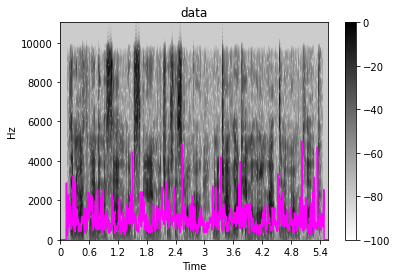

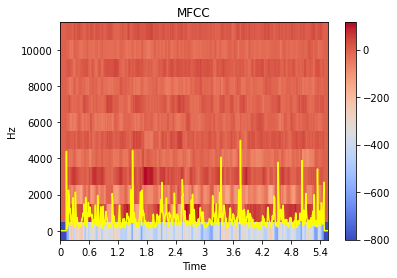

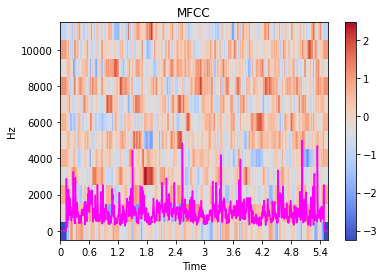

In [3]:
mfcc_n = 12

narr = get_narr(narrative_fns,mfcc_n=mfcc_n,pad=0)
narr_scaler = get_scaler(narrative_fns,mfcc_n=mfcc_n,scaler_type='robust')

clip_fn = "sound/American-English/Narrative/narrative1.wav"
out_path = 'sound/out/'
clip_data = narrative_data[0]
export_audio(out_path+"clip.wav",clip_data)
Audio(out_path+"clip.wav")

sr = clip_data["sr"]
fourier = clip_data["fourier"]
mfcc = clip_data["mfcc"][str(mfcc_n)]
normed_mfcc = norm_array_hor(mfcc,narr_scaler)
vels = get_vels(mfcc,1)
normed_vels = get_vels(normed_mfcc,1)
plot_timeseries_on_spectrogram(fourier,normed_vels,sr,line_color='magenta')
plot_timeseries_on_mfcc(mfcc,vels,sr,line_color='yellow')
plot_timeseries_on_mfcc(normed_mfcc,normed_vels,sr,line_color='magenta')

### "Vowel" words

In [4]:
vowel_dict = {}
for i,vowel_data in enumerate(vowels_data):
    name = vowels_data[i]["fn"].split('/')[-1]
    name = name.split('.')[0]
    vowel_dict[i] = name
print(vowel_dict)

{0: 'bird', 1: 'bed', 2: 'bid', 3: 'above', 4: 'bayed', 5: 'good', 6: 'buy', 7: 'bud', 8: 'bead', 9: 'bough', 10: 'bad', 11: 'boy', 12: 'booed', 13: 'bode', 14: 'pod'}


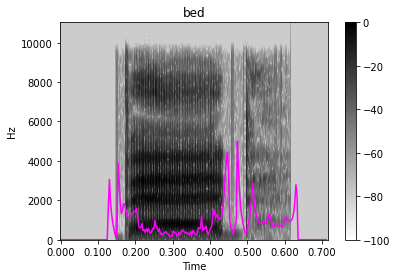

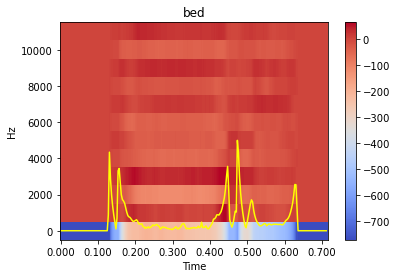

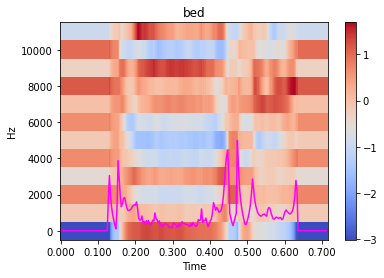

In [5]:
i=1

name = vowels_data[i]["fn"].split('/')[-1]
name = name.split('.')[0]

sr = vowels_data[i]["sr"]
fourier = vowels_data[i]["fourier"]
mfcc = vowels_data[i]["mfcc"][str(mfcc_n)]
normed_mfcc = norm_array_hor(mfcc,narr_scaler)
vels = get_vels(mfcc,1)
normed_vels = get_vels(normed_mfcc,1)

plot_timeseries_on_spectrogram(fourier,normed_vels,sr,title=name,line_color='magenta')
plot_timeseries_on_mfcc(mfcc,vels,sr,title=name,line_color='yellow')
plot_timeseries_on_mfcc(normed_mfcc,normed_vels,sr,title=name,line_color='magenta')

vowel_out = out_path+name+'_from_fourier.wav'
export_audio(vowel_out,vowels_data[i])
Audio(vowel_out)

### "Consonant" words

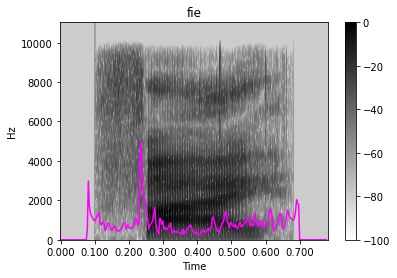

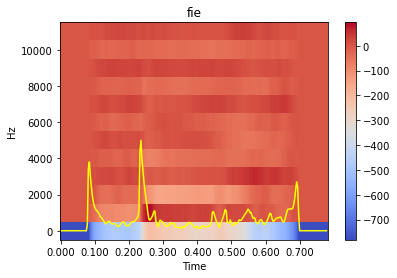

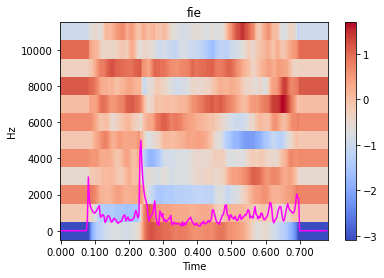

In [6]:
i=2

name = consonants_data[i]["fn"].split('/')[-1]
name = name.split('.')[0]

sr = consonants_data[i]["sr"]
fourier = consonants_data[i]["fourier"]
mfcc = consonants_data[i]["mfcc"][str(mfcc_n)]
normed_mfcc = norm_array_hor(mfcc,narr_scaler)
vels = get_vels(mfcc,1)
normed_vels = get_vels(normed_mfcc,1)

plot_timeseries_on_spectrogram(fourier,normed_vels,sr,title=name,line_color='magenta')
plot_timeseries_on_mfcc(mfcc,vels,sr,title=name,line_color='yellow')
plot_timeseries_on_mfcc(normed_mfcc,normed_vels,sr,title=name,line_color='magenta')

consonant_out = out_path+name+'_from_fourier.wav'
export_audio(consonant_out,consonants_data[i])
Audio(consonant_out)